<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/william-dove/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the solution provided for the 3-mass, 4-spring case:

In [10]:
# 3 mass soln

# import libraries
import numpy as np


# Let's calculate the frequencies numerically:

def calculate_eigenfrequencies_3mass(k, m):
    """ calculate the eigenfrequencies for our three mass problem.

    Args:
    k -- spring constant (N/m)
    m -- mass (kg)

    Returns:
    w1 -- first eigenfrequency
    w2 -- second eigenfrequency
    w3 -- third eigenfrequency
    """
    w0_squared = k / m
    w1 = np.sqrt(2*w0_squared)
    w2 = np.sqrt((2 - np.sqrt(2)) * w0_squared)
    w3 = np.sqrt((2 + np.sqrt(2)) * w0_squared)
    return w1, w2, w3

# Example values
k = 10  # N/m
m = 1   # kg

w1, w2, w3 = calculate_eigenfrequencies_3mass(k, m)

print("Eigenfrequencies:")
print("ω₁ = {:.4f} rad/s".format(w1))
print("ω₂ = {:.4f} rad/s".format(w2))
print("ω₃ = {:.4f} rad/s".format(w3))

Eigenfrequencies:
ω₁ = 4.4721 rad/s
ω₂ = 2.4203 rad/s
ω₃ = 5.8431 rad/s


This is the solution for *n* masses, and springs either attached to walls or not attached:

First, we define functions to create the mass and stiffness matrices.

In [11]:
def setup_mass_matrix(m_list):
  '''
  This function creates a matrix of masses using the provided masses list as the diagnoal terms.

  Args:
  m_list: list of masses (kg)

  Returns:
  mass_matrix: mass matrix (numpy array)
  '''
  M = np.diag(m_list)
  return M

print(setup_mass_matrix([1,1,1]))

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [12]:
def setup_stiffness_matrix(k_list, walls=True):
  '''
  This function creates a matrix of spring constants using the provided spring constants list. The diagonal terms are defined as -(k_n+k_n+1),
  and the off-diagonal terms are defined as k_n+1. If walls=False, the end springs are disregarded and the first and last diagonal elements are
  defined as the second and second to last spring constants respectively.

  Args:
  k_list: list of spring constants (N/m). If walls=False, the first and last elements of the list are ignored.
  walls: boolean value indicating whether the system is attached to walls on both ends.

  Returns:
  stiffness_matrix: stiffness matrix (numpy array)
  '''

  stiffness_matrix = np.diag([-k_list[i] - k_list[i+1] for i in range(len(k_list)-1)])
  stiffness_matrix_offDiags = np.diag(k_list[1:-1], k=+1) + np.diag(k_list[1:-1], k=-1)
  stiffness_matrix += stiffness_matrix_offDiags

  if not walls:
    stiffness_matrix[0,0] = -k_list[1]
    stiffness_matrix[-1,-1] = -k_list[-2]
  return stiffness_matrix

print(setup_stiffness_matrix([10,10,10,10]))
print(setup_stiffness_matrix([10,10,10,10], walls=False))

[[-20  10   0]
 [ 10 -20  10]
 [  0  10 -20]]
[[-10  10   0]
 [ 10 -20  10]
 [  0  10 -10]]


Next, we can use these matrices and the SciPy library for linear algebra to find the eigenfrequencies.

We assume that $x=e^{i\omega x}$ so that $\frac{d^2 x}{dx^2}=-\omega^2 x$. Then we can use $M(-\omega^2)x=Kx \rightarrow M^{-1}Kx=-\omega^2 x$. The eigenvalues of the $M^{-1}K$ matrix are $-\omega^2$ so we can solve for the frequencies.

In [15]:
# Code extended for n masses with unique mass and n+1 springs with unique spring constants.

import scipy.linalg as la

def calculate_eigenfrequencies_nmass(k_list, m_list, walls=True):
    """
    Calculates the eigenfrequencies for a system with n masses and either n-1 or n+1 springs.
    Each mass and spring constant may be unique. Input masses and spring constants as lists.
    If walls=False, the first and last spring constants are ignored and the eigenfrequencies are
    calculated fror a system without outside springs connected to walls.

    Args:
    k_list: list of spring constants (N/m)
    m_list: list of masses (kg)
    walls: boolean value indicating whether the system is attached to walls on both ends.

    Returns:
    omega_list: list of eigenfrequencies (rad/s)
    """
    M = setup_mass_matrix(m_list)
    K = setup_stiffness_matrix(k_list, walls)

    eigs_list = la.eigh(K, M)[0]
    omega_list = np.sqrt(-eigs_list)
    return omega_list

print(calculate_eigenfrequencies_nmass([10,10,10,10],[1,1,1]))

[5.84312721 4.47213595 2.42030254]


Comparing the results from the provided/extended code:

In [16]:
from IPython.display import display, Math

# Example values
k = 10  # N/m
m = 1   # kg
k_list = [10,10,10,10]
m_list = [1,1,1]

# Provided 3 mass code
w1, w2, w3 = calculate_eigenfrequencies_3mass(k, m)
print("Provided Result:")
print("ω₁ = {:.4f} rad/s".format(w1))
print("ω₂ = {:.4f} rad/s".format(w2))
print("ω₃ = {:.4f} rad/s".format(w3))

# My n mass code
my_result = calculate_eigenfrequencies_nmass(k_list, m_list)
print('\nMy Result:')

display(*[Math(rf'\omega_{{{n+1}}} = {my_result[n]:.4f} \text{{ rad/s}}') for n in range(len(my_result))])

# Testing result with no walls
my_result_no_walls = calculate_eigenfrequencies_nmass(k_list, m_list, walls=False)
print('\nMy Result (no walls):')
display(*[Math(rf'\omega_{{{n+1}}} = {my_result_no_walls[n]:.4f} \text{{ rad/s}}') for n in range(len(my_result_no_walls))])

Provided Result:
ω₁ = 4.4721 rad/s
ω₂ = 2.4203 rad/s
ω₃ = 5.8431 rad/s

My Result:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


My Result (no walls):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## AI Creativity

When given the prompt, the AI used a different method than explicitly creating mass and stiffness matrices M and K to solve the differential equation. Instead, it created one matrix D and solved for the eigenfrequencies of this matrix. It also used scipi and the eigh function to find the eigenvectors. Interestingly, it also plotted the results as a bar graph using pyplot. One weakness of the AI's solution is that it only works for a system where all the masses and spring constants are equal.

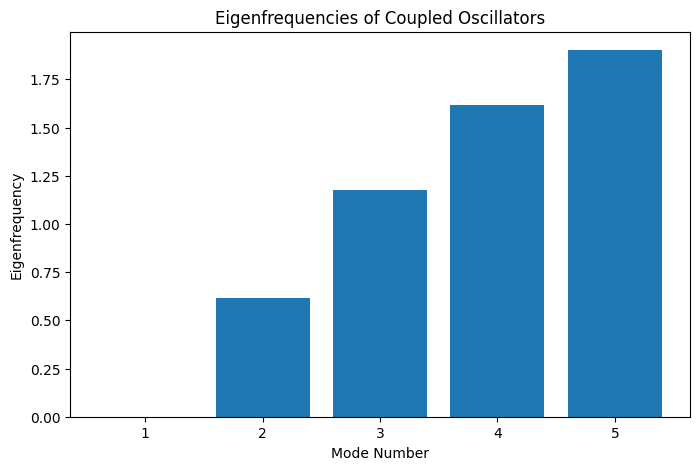

Eigenfrequencies: [0.         0.61803399 1.1755705  1.61803399 1.90211303]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Parameters
N = 5  # Number of masses
m = 1.0  # Mass of each oscillator
k = 1.0  # Spring constant

# Construct the dynamical matrix
D = np.zeros((N, N))
for i in range(N):
    if i > 0:
        D[i, i - 1] = -k/m
    if i < N - 1:
        D[i, i + 1] = -k/m
    D[i, i] = 2 * k/m if (i > 0 and i < N - 1) else k/m

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(D)
frequencies = np.sqrt(np.maximum(eigenvalues, 0))

# Plot eigenfrequencies
plt.figure(figsize=(8, 5))
plt.bar(range(1, N + 1), frequencies)
plt.xlabel("Mode Number")
plt.ylabel("Eigenfrequency")
plt.title("Eigenfrequencies of Coupled Oscillators")
plt.show()

# Display results
print("Eigenfrequencies:", frequencies)